In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로딩

In [20]:
df = sns.load_dataset("penguins")

## 실습 하지 않는 컬럼 삭제

In [21]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [22]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [23]:
# df = df.drop(['island', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'], axis=1)
df.drop(['island', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'], axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         344 non-null    object 
 1   bill_length_mm  342 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


## 데이터 일부로 훼손

In [25]:
target_inddex = np.random.randint(344, size=10)
print(df.loc[target_inddex, "bill_length_mm"])
df.loc[target_inddex, "bill_length_mm"] = df.loc[target_inddex, "bill_length_mm"]*10.0
print(df.loc[target_inddex, "bill_length_mm"])

target_inddex = np.random.randint(344, size=5)
print(df.loc[target_inddex, "bill_length_mm"])
df.loc[target_inddex, "bill_length_mm"] = df.loc[target_inddex, "bill_length_mm"]*-1.0
print(df.loc[target_inddex, "bill_length_mm"])

267    50.5
42     36.0
55     41.4
335    55.1
176    46.7
202    48.1
285    49.8
142    32.1
301    52.5
46     41.1
Name: bill_length_mm, dtype: float64
267    505.0
42     360.0
55     414.0
335    551.0
176    467.0
202    481.0
285    498.0
142    321.0
301    525.0
46     411.0
Name: bill_length_mm, dtype: float64
250    47.3
96     38.1
328    43.3
135    41.1
107    38.2
Name: bill_length_mm, dtype: float64
250   -47.3
96    -38.1
328   -43.3
135   -41.1
107   -38.2
Name: bill_length_mm, dtype: float64


In [26]:
df.loc[0,'species'] = np.NaN
df.loc[1,'species'] = 'DUMMY'

In [27]:
df

,species,bill_length_mm
0,NaN,39.1
1,DUMMY,39.5
2,Adelie,40.3
3,Adelie,NaN
4,Adelie,36.7
...,...,...
339,Gentoo,NaN
340,Gentoo,46.8
341,Gentoo,50.4
342,Gentoo,45.2


In [28]:
df.describe()

,bill_length_mm
count,342.000000
mean,54.634503
std,71.282746
min,-47.300000
25%,39.200000
50%,44.700000
75%,48.775000
max,551.000000


# 카테고리 컬럼 결측치 이상치 처리

In [29]:
df.species.value_counts()

Adelie       150
Gentoo       124
Chinstrap     68
DUMMY          1
Name: species, dtype: int64

In [30]:
df.loc[df.species.isnull()]

,species,bill_length_mm
0,NaN,39.1


## 결측치는 특정 값으로 채움

In [31]:
df.loc[df.species.isnull(), 'species']

0    NaN
Name: species, dtype: object

In [32]:
df.loc[df.species.isnull(), 'species'] = 'Adelie'

In [33]:
df.loc[df.species.isnull()]

,species,bill_length_mm


## 이상치는 버림

In [34]:
df.species.value_counts()

Adelie       151
Gentoo       124
Chinstrap     68
DUMMY          1
Name: species, dtype: int64

In [35]:
df.loc[df.species=="DUMMY"]

,species,bill_length_mm
1,DUMMY,39.5


In [36]:
df[df.species=="DUMMY"].index

Int64Index([1], dtype='int64')

In [37]:
df = df.drop((df[df.species=="DUMMY"].index))

In [38]:
df.species.value_counts()

Adelie       151
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         343 non-null    object 
 1   bill_length_mm  341 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


In [40]:
df.describe()

,bill_length_mm
count,341.000000
mean,54.678886
std,71.382764
min,-47.300000
25%,39.200000
50%,44.900000
75%,48.800000
max,551.000000


# 카테고리 데이터 인코딩

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         343 non-null    object 
 1   bill_length_mm  341 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


In [42]:
df.species.value_counts()

Adelie       151
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [43]:
 df['species'].astype('category')
 print(df)

    species  bill_length_mm
0    Adelie            39.1
2    Adelie            40.3
3    Adelie             NaN
4    Adelie            36.7
5    Adelie            39.3
..      ...             ...
339  Gentoo             NaN
340  Gentoo            46.8
341  Gentoo            50.4
342  Gentoo            45.2
343  Gentoo            49.9

[343 rows x 2 columns]


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         343 non-null    object 
 1   bill_length_mm  341 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


In [45]:
df['species'] = df['species'].astype('category')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   species         343 non-null    category
 1   bill_length_mm  341 non-null    float64 
dtypes: category(1), float64(1)
memory usage: 5.8 KB


In [47]:
df['species_code'] = df.species.cat.codes

In [48]:
df

,species,bill_length_mm,species_code
0,Adelie,39.1,0
2,Adelie,40.3,0
3,Adelie,NaN,0
4,Adelie,36.7,0
5,Adelie,39.3,0
...,...,...,...
339,Gentoo,NaN,2
340,Gentoo,46.8,2
341,Gentoo,50.4,2
342,Gentoo,45.2,2


```
 df['species'].astype('category')
 df['species_code'] = df.species.cat.codes
```

```
def encode_species(org):
  if org=="Adelie": return 0
  if org=="Gentoo": return 1
  if org=="Chinstrap": return 2
  return -1

df['sepecies_code'] = df.species.applymap(encode_species)
```

# 데이터 살펴 보기

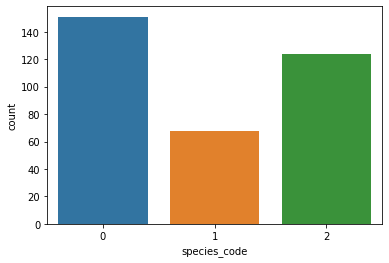

In [49]:
sns.countplot(data=df, x="species_code")
plt.show()

In [50]:
df.columns

Index(['species', 'bill_length_mm', 'species_code'], dtype='object')

# 이상치

## 이상치 보기

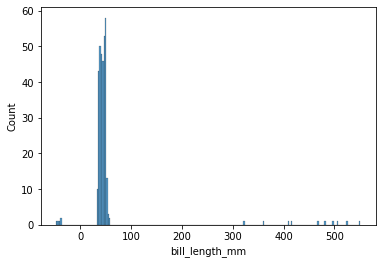

In [51]:
sns.histplot(data=df, x="bill_length_mm")

In [52]:
print(df.loc[(df.bill_length_mm<0.) | (df.bill_length_mm>100.), "bill_length_mm"])

42     360.0
46     411.0
55     414.0
96     -38.1
107    -38.2
135    -41.1
142    321.0
176    467.0
202    481.0
250    -47.3
267    505.0
285    498.0
301    525.0
328    -43.3
335    551.0
Name: bill_length_mm, dtype: float64


## 이상치 처리하기

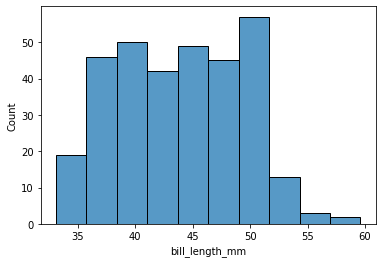

In [53]:
sns.histplot(df.loc[(df.bill_length_mm>=0.0) & (df.bill_length_mm<=100.), "bill_length_mm"])

In [54]:
min = df.loc[(df.bill_length_mm>=0.0) & (df.bill_length_mm<=100.), "bill_length_mm"].min()
max = df.loc[(df.bill_length_mm>=0.0) & (df.bill_length_mm<=100.), "bill_length_mm"].max()
print(min, max)

33.1 59.6


In [55]:
df.loc[df.bill_length_mm < 0.0, "bill_length_mm"] = min
df.loc[df.bill_length_mm > 100.0, "bill_length_mm"] = max

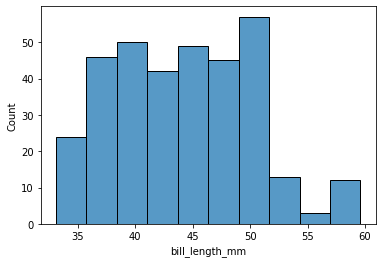

In [56]:
sns.histplot(df.bill_length_mm)

# 결측치

## 결측기 보기

In [57]:
df.isnull().any()

species           False
bill_length_mm     True
species_code      False
dtype: bool

In [58]:
df.isnull().sum()

species           0
bill_length_mm    2
species_code      0
dtype: int64

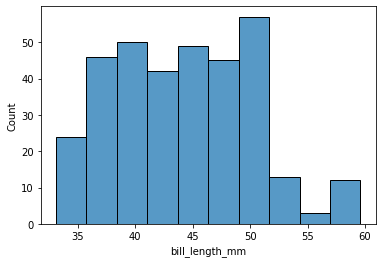

In [59]:
sns.histplot(data=df, x="bill_length_mm")

## 결측치 처리하기

In [60]:
working_df = df.fillna(df.mean())

In [61]:
working_df.isnull().sum()

species           0
bill_length_mm    0
species_code      0
dtype: int64

In [62]:
working_df

,species,bill_length_mm,species_code
0,Adelie,39.100000,0
2,Adelie,40.300000,0
3,Adelie,44.228739,0
4,Adelie,36.700000,0
5,Adelie,39.300000,0
...,...,...,...
339,Gentoo,44.228739,2
340,Gentoo,46.800000,2
341,Gentoo,50.400000,2
342,Gentoo,45.200000,2


# Normalarization

In [63]:
working_df.describe()

,bill_length_mm,species_code
count,343.000000,343.000000
mean,44.228739,0.921283
std,6.058047,0.893241
min,33.100000,0.000000
25%,39.200000,0.000000
50%,44.500000,1.000000
75%,48.750000,2.000000
max,59.600000,2.000000


In [64]:
working_df

,species,bill_length_mm,species_code
0,Adelie,39.100000,0
2,Adelie,40.300000,0
3,Adelie,44.228739,0
4,Adelie,36.700000,0
5,Adelie,39.300000,0
...,...,...,...
339,Gentoo,44.228739,2
340,Gentoo,46.800000,2
341,Gentoo,50.400000,2
342,Gentoo,45.200000,2


In [65]:
working_df = working_df.drop(["species"], axis=1)

In [66]:
working_df = ( working_df - working_df.min() ) / ( working_df.max() - working_df.min() )

In [67]:
working_df.describe()

,bill_length_mm,species_code
count,343.000000,343.000000
mean,0.419952,0.460641
std,0.228606,0.446620
min,0.000000,0.000000
25%,0.230189,0.000000
50%,0.430189,0.500000
75%,0.590566,1.000000
max,1.000000,1.000000


In [68]:
df['bill_length_mm_processed'] = working_df.bill_length_mm

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   species                   343 non-null    category
 1   bill_length_mm            341 non-null    float64 
 2   species_code              343 non-null    int8    
 3   bill_length_mm_processed  343 non-null    float64 
dtypes: category(1), float64(2), int8(1)
memory usage: 18.8 KB


In [70]:
df.describe()

,bill_length_mm,species_code,bill_length_mm_processed
count,341.000000,343.000000,343.000000
mean,44.228739,0.921283,0.419952
std,6.075839,0.893241,0.228606
min,33.100000,0.000000,0.000000
25%,39.200000,0.000000,0.230189
50%,44.900000,1.000000,0.430189
75%,48.800000,2.000000,0.590566
max,59.600000,2.000000,1.000000


In [71]:
df

,species,bill_length_mm,species_code,bill_length_mm_processed
0,Adelie,39.1,0,0.226415
2,Adelie,40.3,0,0.271698
3,Adelie,NaN,0,0.419952
4,Adelie,36.7,0,0.135849
5,Adelie,39.3,0,0.233962
...,...,...,...,...
339,Gentoo,NaN,2,0.419952
340,Gentoo,46.8,2,0.516981
341,Gentoo,50.4,2,0.652830
342,Gentoo,45.2,2,0.456604


# 마무리

In [72]:
df['species'] = df.species_code
df['bill_length_mm'] = df.bill_length_mm_processed

df.drop(["species_code", "bill_length_mm_processed"], axis=1, inplace=True)

In [73]:
df

,species,bill_length_mm
0,0,0.226415
2,0,0.271698
3,0,0.419952
4,0,0.135849
5,0,0.233962
...,...,...
339,2,0.419952
340,2,0.516981
341,2,0.652830
342,2,0.456604


In [74]:
df.describe()

,species,bill_length_mm
count,343.000000,343.000000
mean,0.921283,0.419952
std,0.893241,0.228606
min,0.000000,0.000000
25%,0.000000,0.230189
50%,1.000000,0.430189
75%,2.000000,0.590566
max,2.000000,1.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         343 non-null    int8   
 1   bill_length_mm  343 non-null    float64
dtypes: float64(1), int8(1)
memory usage: 15.7 KB
